In [2]:
import os
import tensorflow as tf
#from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [9]:
nPoint = 1000
X = np.linspace(0,4*np.pi, nPoint)
y = np.sin(X) + np.random.random((nPoint,))/2 + X*3/4 + np.cos(3/2*X)

X = X[..., np.newaxis]

#fig, ax = plt.subplots()
#ax.plot(X,y,'*--')

In [4]:
normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(X)

2021-09-24 20:50:31.264550: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-24 20:50:31.265197: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-24 20:50:31.265803: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
tf.keras.backend.clear_session()

def model1():
    
layerIn = Input(shape=(1,))

layerMid = normalizer(layerIn)
for _ in range(2):
    layerMid = Dense(64,activation='sigmoid', kernel_initializer='normal')(layerMid)
    # layerMid = BatchNormalization()(layerMid)

layerOut = Dense(1, kernel_initializer='normal')(layerMid)

model = Model(inputs=layerIn, outputs=layerOut)

model.summary()

callback = EarlyStopping(monitor='loss', patience=40, min_delta=0)

checkpoint_filepath = os.path.join( os.getcwd(),'tmp','checkpoint')
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss',
    mode='min',
    save_best_only=True)

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])

history = model.fit(X,y,epochs=1000,callbacks=[model_checkpoint_callback, callback ],verbose=1)


2021-09-24 20:50:31.456284: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
normalization (Normalization (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________
Epoch 1/1000


2021-09-24 20:50:31.477013: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1999965000 Hz


32/32 [==============================] - 1s 3ms/step - loss: 2.4488 - mean_absolute_percentage_error: 68.2188


2021-09-24 20:50:32.328486: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /home/nnnpooh/Coding/class/ai-class-2564-1/Topic 07 - ANN/tmp/checkpoint/assets
Epoch 2/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.8129 - mean_absolute_percentage_error: 20.9919
INFO:tensorflow:Assets written to: /home/nnnpooh/Coding/class/ai-class-2564-1/Topic 07 - ANN/tmp/checkpoint/assets
Epoch 3/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.7093 - mean_absolute_percentage_error: 15.8831
INFO:tensorflow:Assets written to: /home/nnnpooh/Coding/class/ai-class-2564-1/Topic 07 - ANN/tmp/checkpoint/assets
Epoch 4/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.6262 - mean_absolute_percentage_error: 12.2375
INFO:tensorflow:Assets written to: /home/nnnpooh/Coding/class/ai-class-2564-1/Topic 07 - ANN/tmp/checkpoint/assets
Epoch 5/1000
32/32 [==============================] - 0s 5ms/step - loss: 0.5730 - mean_absolute_percentage_error: 12.1733
INFO:tensorflow:Assets written to: /home/nnnpooh

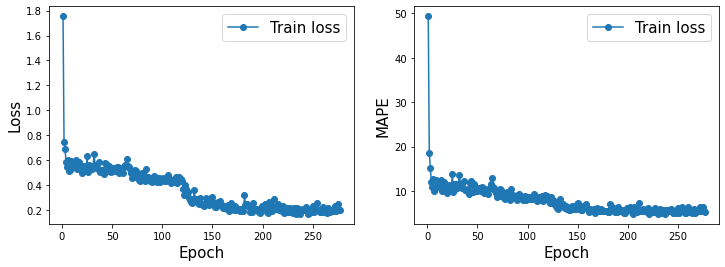

In [7]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['mean_absolute_percentage_error'], '-o', label='Train loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('MAPE', size=15)
ax.legend(fontsize=15)


plt.show()

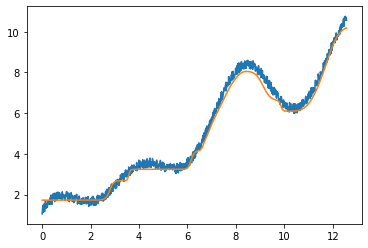

In [8]:
y_pred = model(X)
fig ,ax = plt.subplots()
ax.plot(X,y)
ax.plot(X,y_pred)